This is a simple linear regression model that uses the sklearn linear regression algorithm to find conclusions based on a NASA Near Earth Object Dataset. This program is intended to be a reference for my future projects.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
df = pd.read_csv('exoplanet.csv')

First hypothesis would be that the distance of an exoplanet would render it less luminous. Let us predict the distance of an exoplanet given the apparent magnitude of it. The higher the number of the apparent luminosity , the lower the value we assign to it.

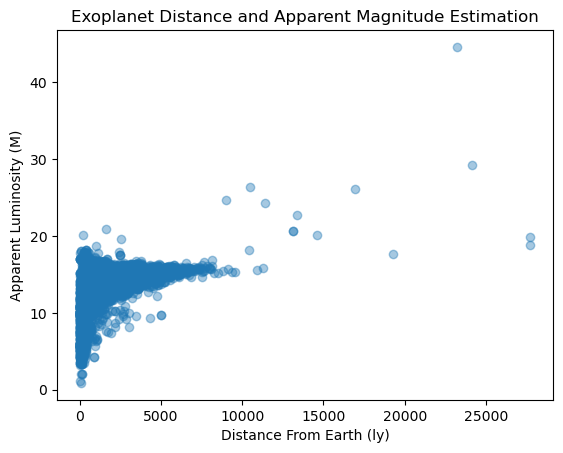

In [2]:
brightness = df['stellar_magnitude']
distance = df['distance']
plt.scatter(distance,brightness, alpha=0.4)

plt.title("Exoplanet Distance and Apparent Magnitude Estimation")
plt.xlabel("Distance From Earth (ly)")
plt.ylabel("Apparent Luminosity (M)")
plt.show()

It is clear that the short distance from Earth renders a ranging apparent luminosity, because we can actually gauge the other factors that go into how bright a planet is. Some exoplanets seem bright and some seem dim (remember that the lower values actually pertain to a higher apparent luminosity) at close distance because we can gauge how bright they actually are. 

As we move further away, the apparent brightness begins to stabalize because the distance creates more factors that inhibit our ability to see its light. There is a lack of data for exoplanets from 8000 light years and above; we will first test on the full set and get rid of outliers after. 

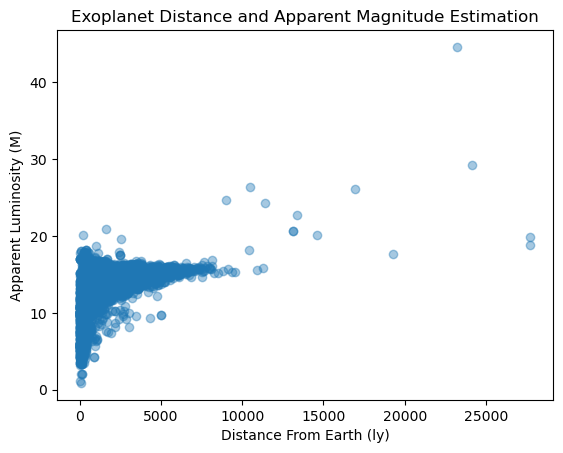

In [3]:
plot_max = 5250
cleaned_df = df.dropna(subset=['stellar_magnitude', 'distance']) 
cleaned_df = cleaned_df.sort_values(by='distance')
# Cleaning the data is important as there are N/A data inputs in some of the inputs. Sklearn does not allow for empty data
# Sort the data by distance from low to high so we can cut some data off from the plotting or model later

# Preparing the data for linear regression

distance = cleaned_df['distance'].values.reshape(-1, 1)  # Reshaping for scikit-learn with .reshape into 2D array; .values is used because sklearn expects the input data as numpy array, and we read it as a pandas object to start dimensional

brightness = cleaned_df['stellar_magnitude'].values  # Target variable to predict; reshaping not necessary as y should be 1

plt.scatter(distance, brightness, label='Actual data', alpha= 0.4) # Scatter plot the data up

plt.title("Exoplanet Distance and Apparent Magnitude Estimation")
plt.xlabel("Distance From Earth (ly)")
plt.ylabel("Apparent Luminosity (M)")

plt.show()

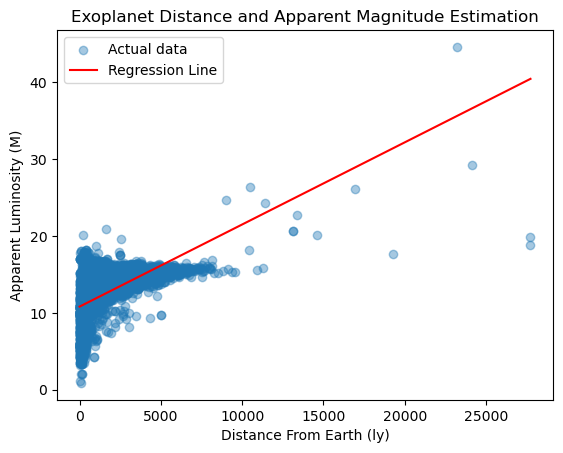

In [4]:
# Create regression model and plot
model = LinearRegression()
model.fit(distance,brightness) # Fit data
predicted_brightness = model.predict(distance) # Predict based off distance

plt.scatter(distance, brightness, label='Actual data', alpha= 0.4)

plt.title("Exoplanet Distance and Apparent Magnitude Estimation")
plt.xlabel("Distance From Earth (ly)")
plt.ylabel("Apparent Luminosity (M)")
plt.plot(distance, predicted_brightness, color = "red", label='Regression Line')
plt.legend()
plt.show()

The outliers make up a small fraction of the data but still has a weight on the loss algorithm. Here is the regression line tested up to around 6000 ~ 8000 light years.

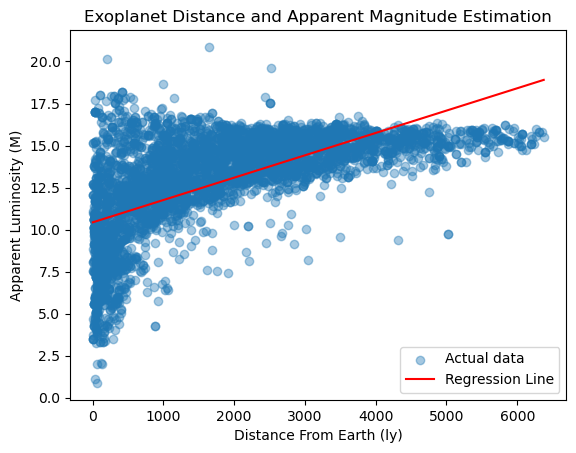

In [5]:
# Create regression model and plot
plot_show = 5000
cleaned_df = cleaned_df.head(plot_show)

distance = cleaned_df['distance'].values.reshape(-1, 1) 
brightness = cleaned_df['stellar_magnitude'].values 
model = LinearRegression()
model.fit(distance,brightness) # Fit data
predicted_brightness = model.predict(distance) # Predict based off distance
plt.scatter(distance, brightness, label='Actual data', alpha= 0.4)

plt.title("Exoplanet Distance and Apparent Magnitude Estimation")
plt.xlabel("Distance From Earth (ly)")
plt.ylabel("Apparent Luminosity (M)")
plt.plot(distance, predicted_brightness, color = "red", label='Regression Line')
plt.legend()
plt.show()

I would do tests to find accuracy of this model, but it is clear with both modern knowledge of astrophysics and the line fit to the data shown that it is difficult to accurately predict the luminosity of an exoplanet with its distance from Earth. 

According to further research, the luminosty of an exoplanet is dependent on many factors and there are many analytical methods of calculating the luminosity and other aspects of an exoplanet. This was a demonstration of how linear regression can help the prediction, and I will later find how to better predict this value. Possibly with multiple value regression or a higher confidence method.